In [17]:
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split


In [18]:
vehdf= pd.read_csv("/content/vehicle-2.csv")
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#print(vehdf)
vehdf.head(200)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,86,43.0,66.0,130.0,56.0,7,152.0,44.0,19.0,142,177.0,340.0,173.0,81.0,6.0,14.0,181.0,185,bus
196,107,56.0,104.0,231.0,71.0,11,219.0,31.0,25.0,172,226.0,705.0,217.0,71.0,19.0,11.0,189.0,196,car
197,82,44.0,72.0,150.0,64.0,7,154.0,44.0,19.0,144,181.0,350.0,177.0,80.0,0.0,16.0,183.0,187,bus
198,81,46.0,71.0,130.0,56.0,7,153.0,44.0,19.0,149,172.0,342.0,191.0,81.0,3.0,14.0,180.0,186,bus


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
columns = vehdf.columns
#Let's Label Encode our class variable:
print(columns)
vehdf['class'] = le.fit_transform(vehdf['class'])
vehdf.shape

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


(846, 19)

In [20]:
vehdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [21]:
from sklearn.impute import SimpleImputer

newdf = vehdf.copy()

X = newdf.iloc[:,0:19] #separting all numercial independent attribute
#y = vehdf.iloc[:,18] #seprarting class attribute.
#imputer = SimpleImputer()
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe()

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.823877,82.100473,168.874704,61.677305,8.567376,168.887707,40.936170,20.580378,147.998818,188.596927,439.314421,174.706856,72.443262,6.361702,12.600473,188.918440,195.632388,0.977541
std,8.234474,6.134272,15.741569,33.401356,7.882188,4.601217,33.197710,7.811882,2.588558,14.515652,31.360427,176.496341,32.546277,7.468734,4.903244,8.930962,6.152247,7.438797,0.702130
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000,0.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000,1.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,1.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000,2.000000


In [22]:
print("Original null value count:", vehdf.isnull().sum())
print("\n\nCount after we impiuted the NaN value: ", newdf.isnull().sum())

Original null value count: compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


Count after we impiuted the NaN value:  compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity     

In [23]:
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [24]:
newdf.shape

(846, 19)

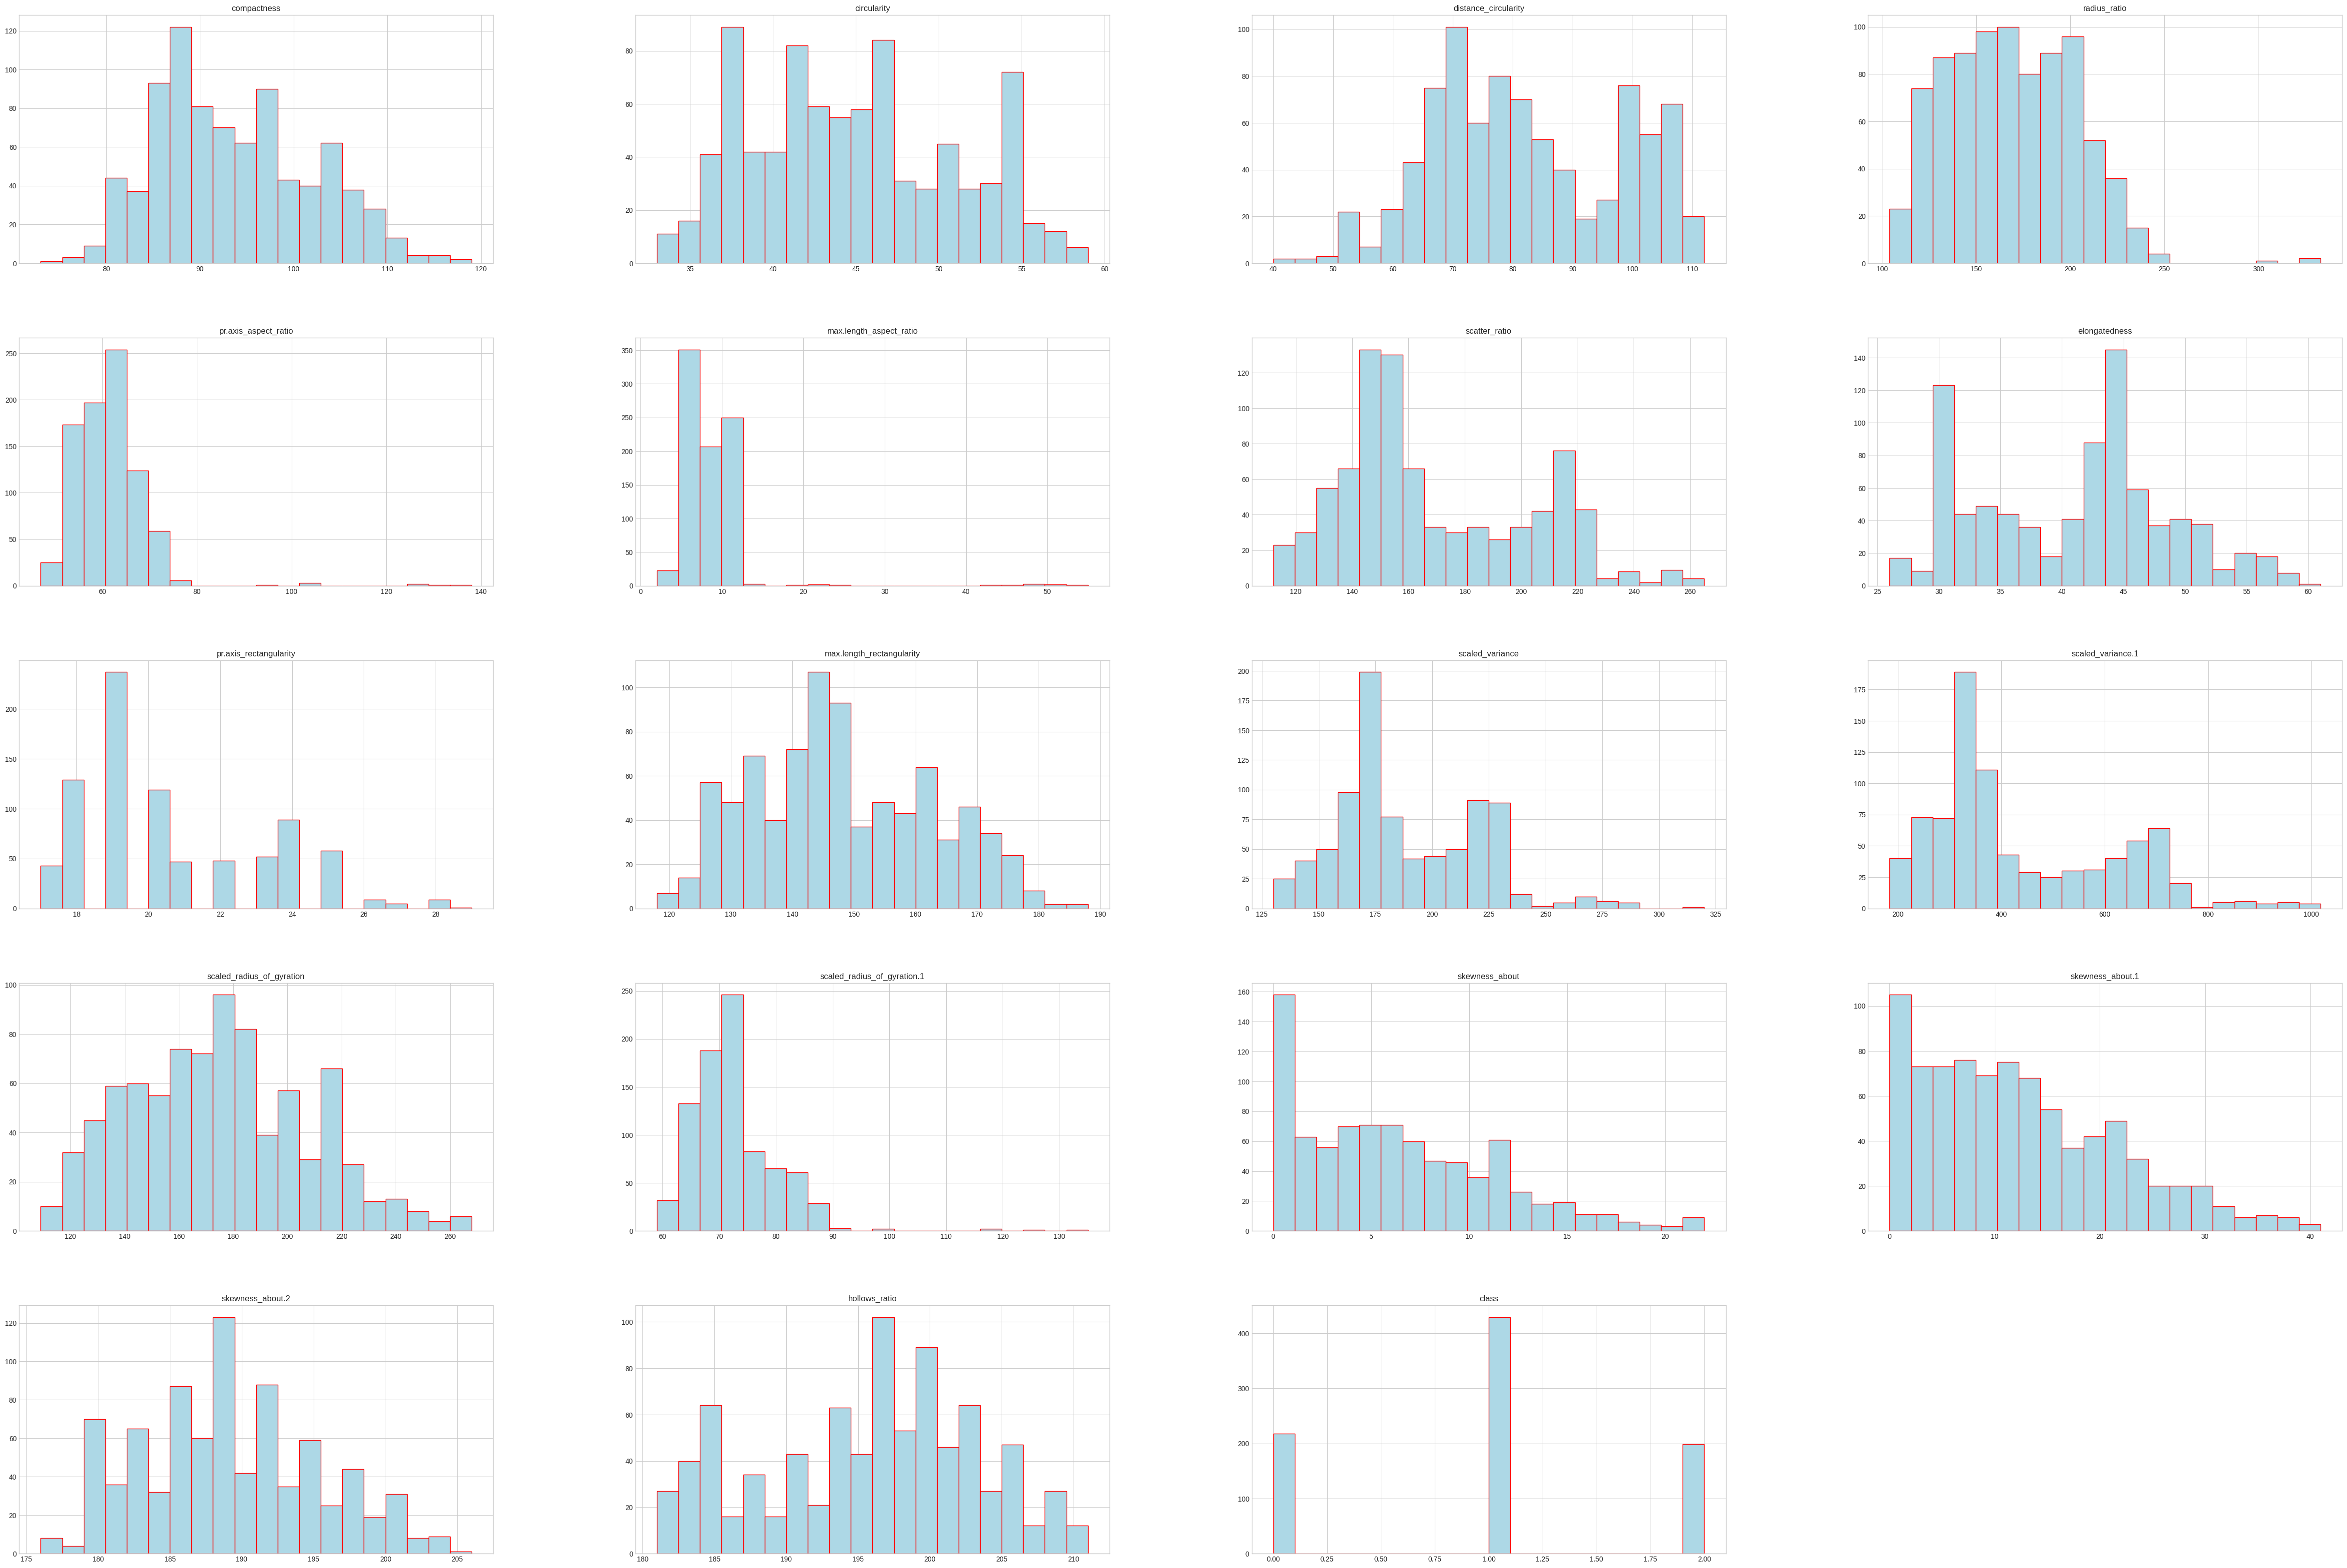

In [25]:
plt.style.use('seaborn-whitegrid')

newdf.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

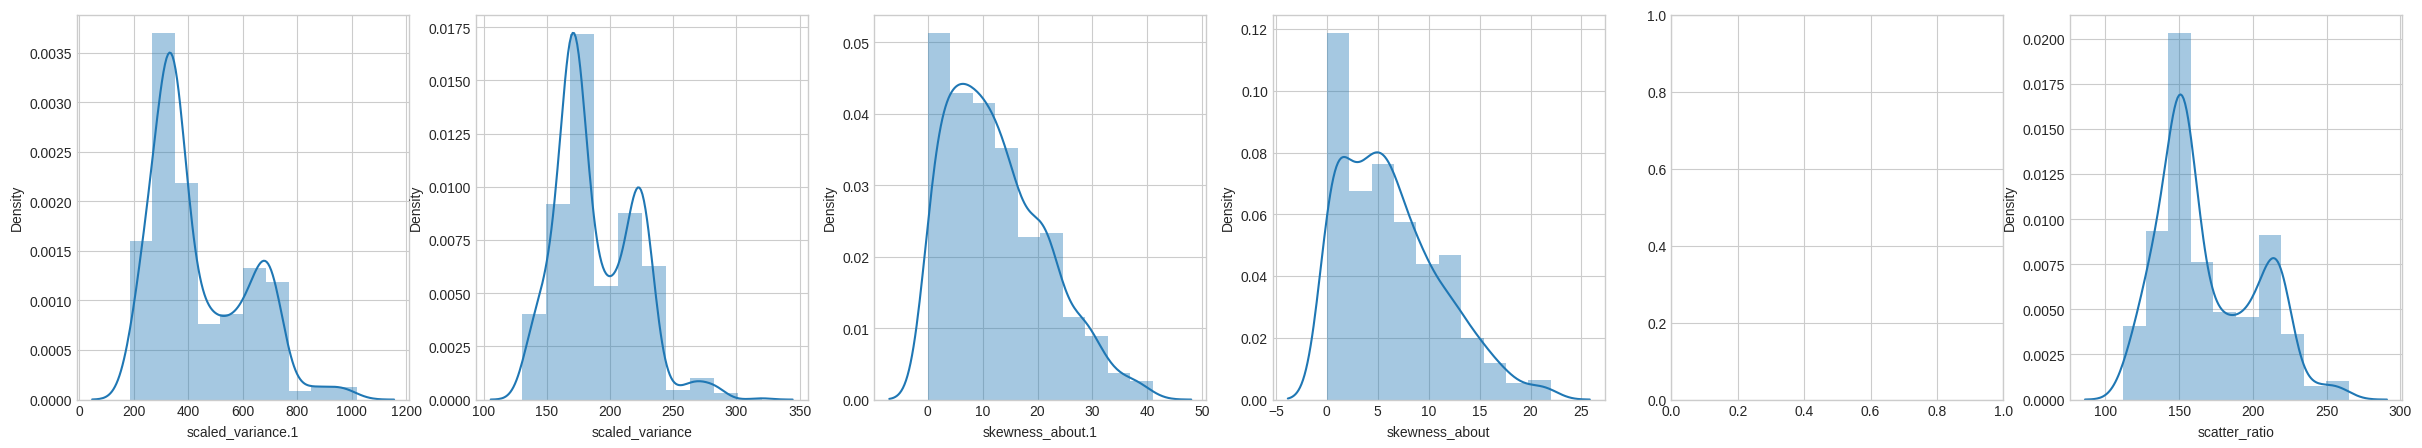

In [26]:
#Let us use seaborn distplot to analyze the distribution of our columns and see the skewness in attributes
f, ax = plt.subplots(1, 6, figsize=(30,5))
vis1 = sns.distplot(newdf["scaled_variance.1"],bins=10, ax= ax[0])
vis2 = sns.distplot(newdf["scaled_variance"],bins=10, ax=ax[1])
vis3 = sns.distplot(newdf["skewness_about.1"],bins=10, ax= ax[2])
vis4 = sns.distplot(newdf["skewness_about"],bins=10, ax=ax[3])
vis6 = sns.distplot(newdf["scatter_ratio"],bins=10, ax=ax[5])

f.savefig('subplot.png')

In [27]:
skewValue = newdf.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64


In [28]:
#now separate the dataframe into dependent and independent variables
#X1= newdf.drop('class',axis=1)
#y1 = newdf['class']
#print("shape of new_vehicle_df_independent_attr::",X.shape)
#print("shape of new_vehicle_df_dependent_attr::",y.shape)

X = newdf.iloc[:,0:18].values
y = newdf.iloc[:,18].values

X

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

In [29]:
from sklearn.preprocessing import StandardScaler
#We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation. We will create the PCA dimensions
# on this distribution.
sc = StandardScaler()
X_std =  sc.fit_transform(X)


In [30]:

cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  

In [31]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.38405773e-01 -7.40350569e-02  4.34748988e-01
  -1.67572478e-01 -2.05031597e-01  7.06489498e-01 -3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01  2.75074211e-01 -4.26053415e-02
  -4.61473714e-02 -

In [32]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404602609088712, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.014922058524634, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389683, array([-0.11992248, -0.02482055, -0.05601433,  0.27507421,  0.64201297,
        0.5918013 , -0.09762831,  0.05764844, -0.10951242, -0.0170642 ,
        0.05632398, -0.10884073, -0.03146365,  0.28627701, -0.11567935,
       -0.07528289,  0.00873592,  0.03952427])), (1.1799374684450206, array([ 0.07838436,  0.18733741, -0.07120084, -0.04260534,  0.03272571,
        0.03141473, -0.09574857,  0.0822902 , -0.0

In [33]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry
# cumulative reaching almost 100%

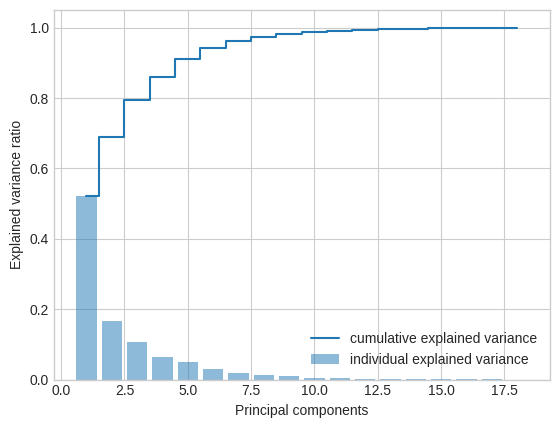

In [34]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [35]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

,0,1,2,3,4,5,6,7
0,0.334162,0.219026,1.001584,0.176612,0.079301,0.757447,0.901124,-0.381106
1,-1.591711,0.420603,-0.369034,0.233234,0.693949,0.517162,-0.378637,0.247059
2,3.769324,-0.195283,0.087859,1.202212,0.731732,-0.705041,0.034584,0.482772
3,-1.738598,2.829692,0.109456,0.376685,-0.362897,0.484431,-0.470753,-0.023086
4,0.558103,-4.758422,11.703647,0.147464,3.256953,0.203446,-2.671578,-0.448854
...,...,...,...,...,...,...,...,...
841,-0.442648,0.605884,0.197213,-1.444958,1.065425,-0.820179,0.041563,0.506991
842,-0.314956,-0.164511,0.794573,-0.908272,-0.235492,1.438257,0.599113,-0.153086
843,4.809174,0.001249,0.532333,0.295652,-1.344236,0.217070,-0.573249,0.110478
844,-3.294092,1.008276,-0.357003,-1.933675,0.042768,0.402491,0.202406,0.320622


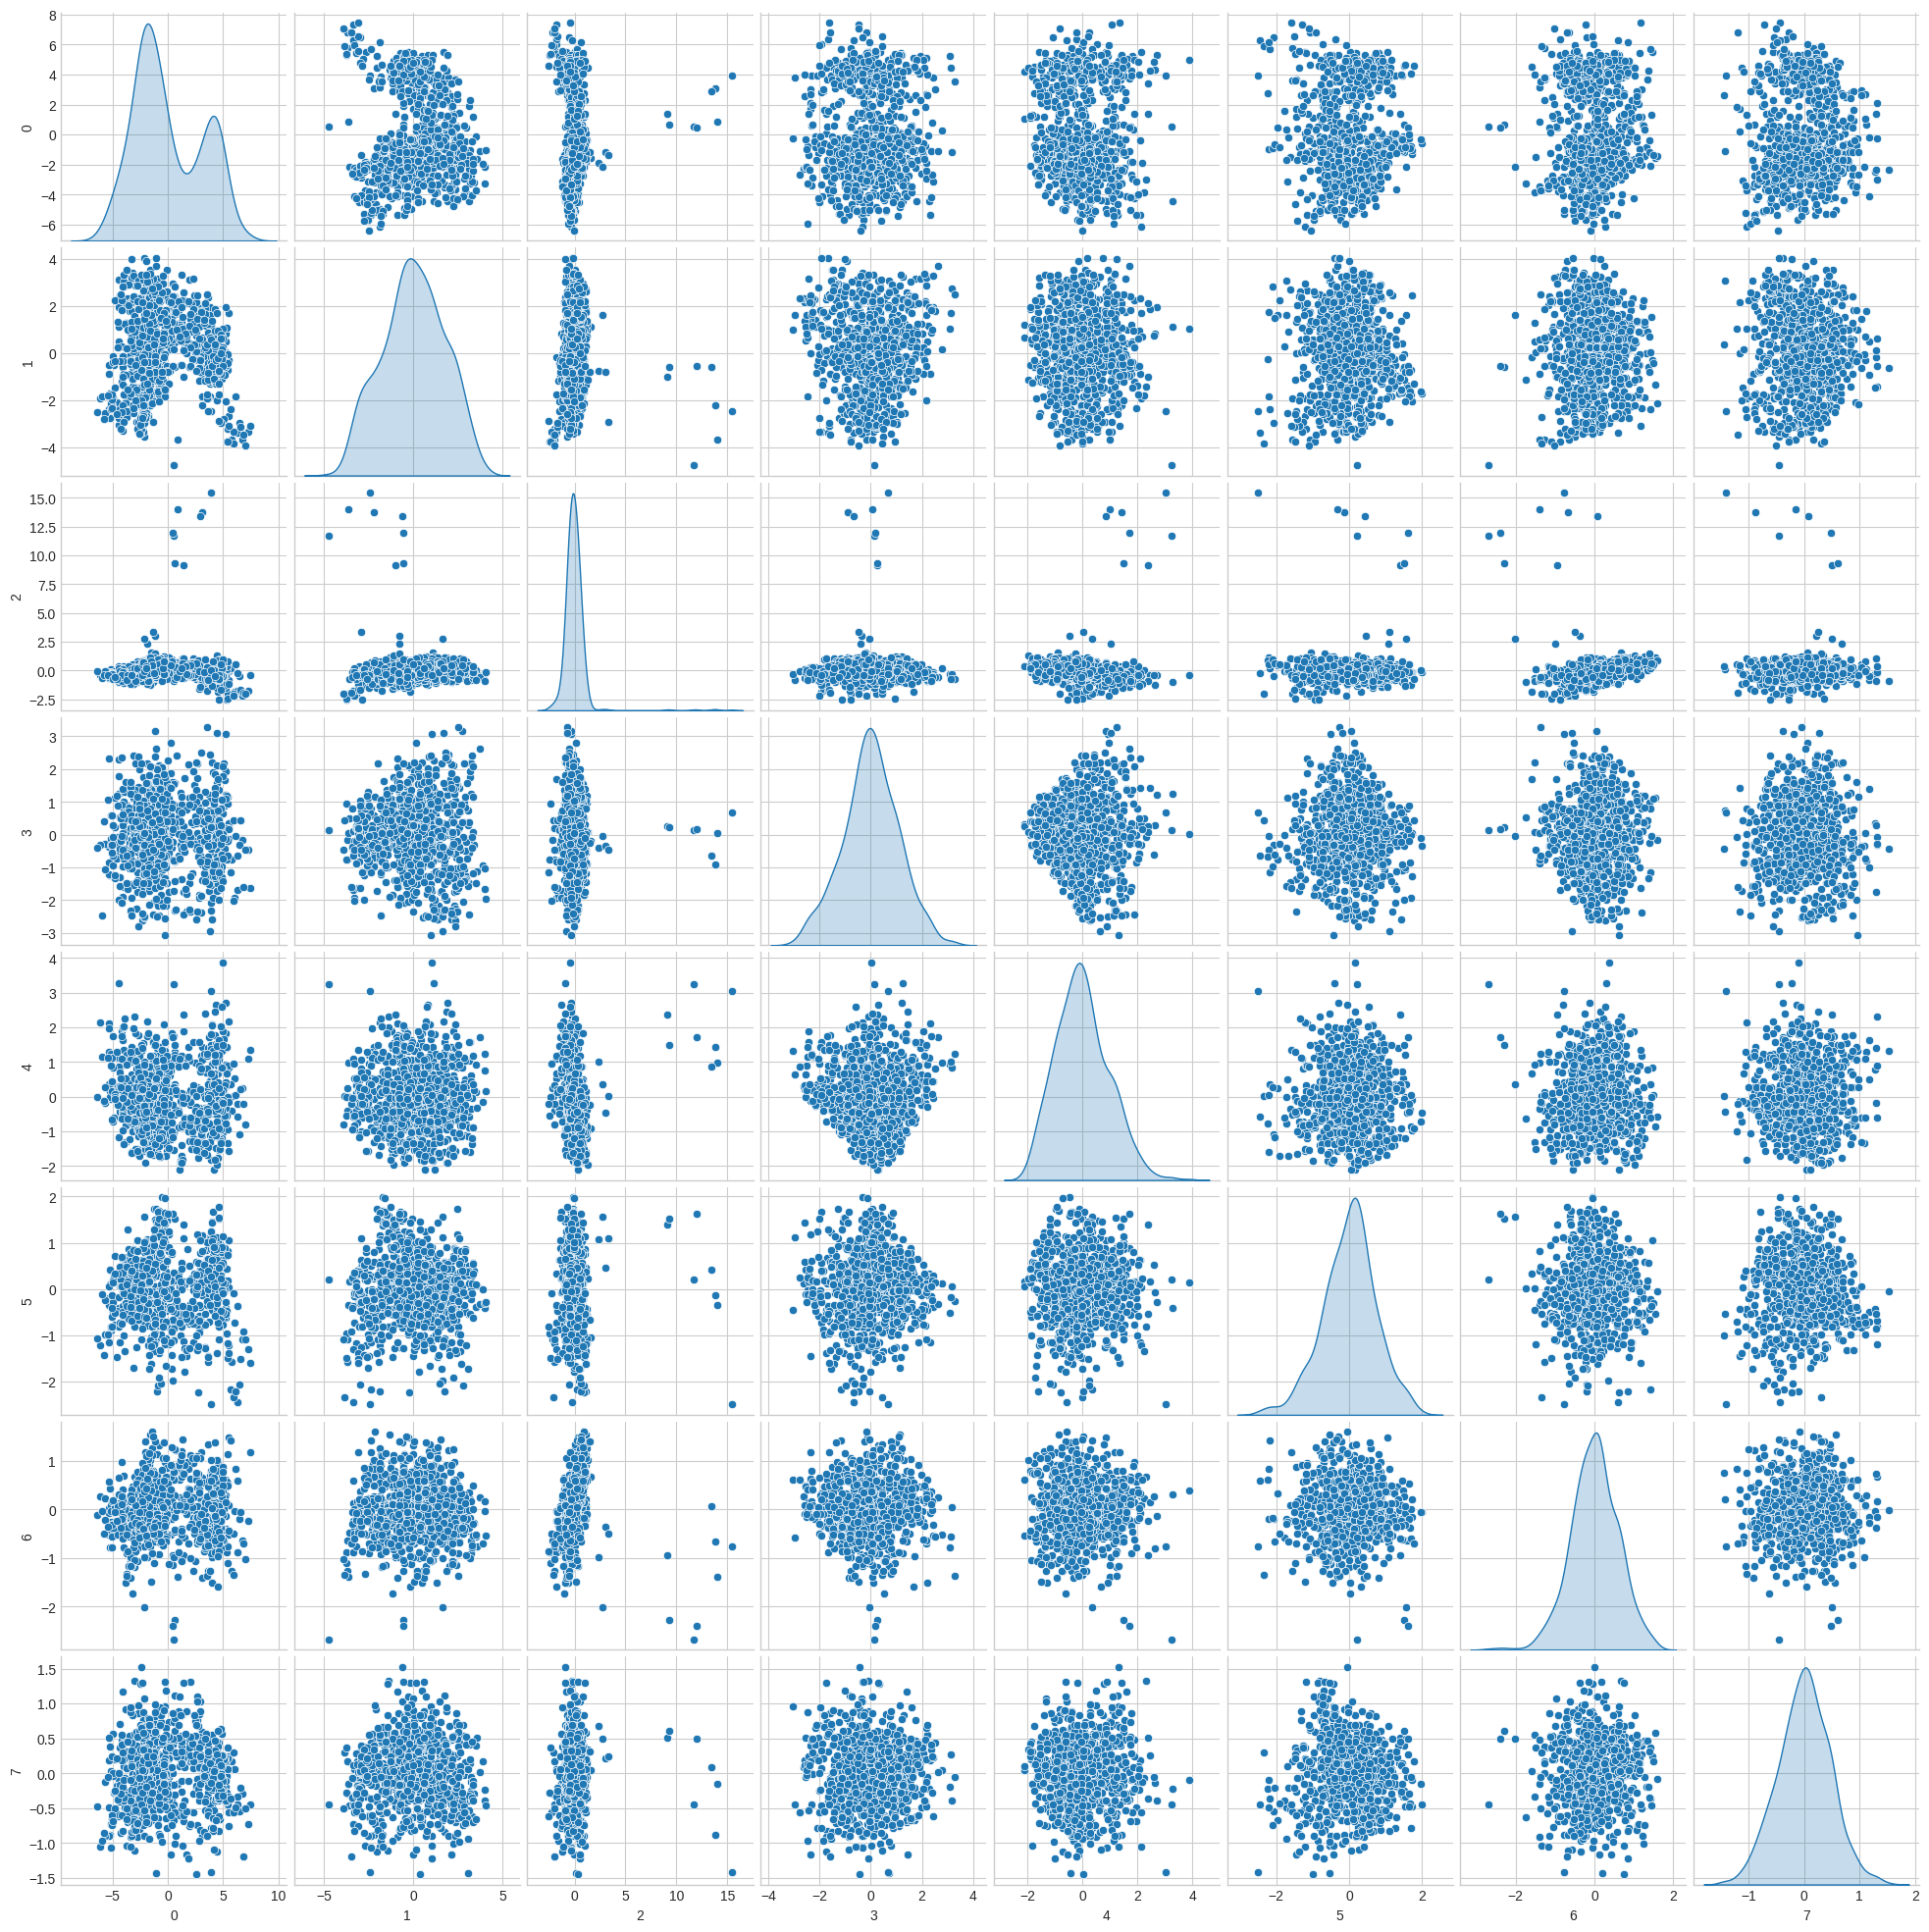

In [36]:
sns.pairplot(reduced_pca, diag_kind='kde')
#sns.pairplot(reduced_pca1, diag_kind='kde')

In [37]:
#now split the data into 70:30 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)
#pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca1,y,test_size=0.30,random_state=1)

In [38]:

svc = SVC() #instantiate the object


In [39]:
#fit the model on orighinal raw data
svc.fit(Orig_X_train,Orig_y_train)

SVC()

In [40]:
#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)

In [41]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test)

In [42]:
#display accuracy score of both models

print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))

print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Original Data  0.952755905511811
Model Score On Reduced PCA Dimension  0.937007874015748
Before PCA On Original 18 Dimension 0.952755905511811
After PCA(On 8 dimension) 0.937007874015748


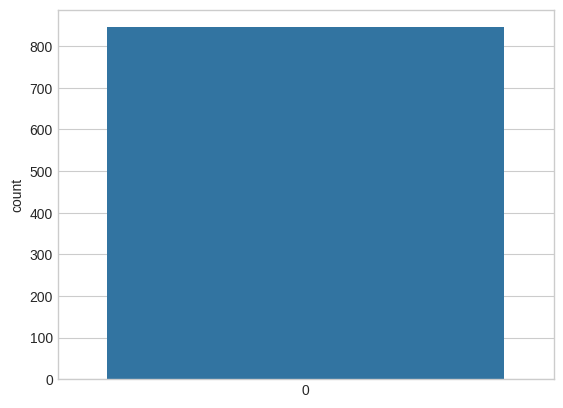

In [74]:
#display how many are car,bus,van.
newdf['class'].value_counts()

splitscaledf = newdf.copy()
sns.countplot(newdf['class'])
plt.show()

In [75]:
splitscaledf.head(850)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,2.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,2.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,1.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,2.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,1.0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,2.0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0,1.0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0,1.0


In [76]:
splitscale_X = splitscaledf.iloc[:,0:18].values
splitscale_y = splitscaledf.iloc[:,18].values

print("Indpendent Variable X",splitscale_X )
print("Class Variable y",splitscale_y )

Indpendent Variable X [[ 95.  48.  83. ...  16. 187. 197.]
 [ 91.  41.  84. ...  14. 189. 199.]
 [104.  50. 106. ...   9. 188. 196.]
 ...
 [106.  54. 101. ...   4. 187. 201.]
 [ 86.  36.  78. ...  25. 190. 195.]
 [ 85.  36.  66. ...  18. 186. 190.]]
Class Variable y [2. 2. 1. 2. 0. 0. 0. 2. 2. 1. 2. 1. 0. 2. 0. 1. 2. 0. 1. 1. 0. 2. 0. 0.
 1. 2. 1. 1. 0. 1. 2. 1. 1. 1. 1. 2. 0. 2. 1. 0. 1. 2. 2. 1. 1. 2. 2. 0.
 2. 1. 1. 1. 1. 0. 0. 2. 1. 2. 1. 2. 1. 1. 2. 0. 0. 1. 0. 1. 2. 0. 1. 1.
 1. 1. 2. 1. 1. 1. 0. 0. 0. 0. 2. 1. 0. 0. 2. 2. 0. 1. 1. 1. 1. 2. 0. 1.
 1. 0. 1. 0. 0. 2. 2. 2. 0. 1. 1. 1. 0. 0. 2. 2. 1. 1. 2. 2. 1. 1. 0. 0.
 1. 2. 2. 1. 2. 2. 0. 0. 2. 0. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 0. 1. 0.
 1. 1. 2. 0. 1. 2. 1. 0. 1. 1. 2. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 2. 1. 0. 2. 0. 2. 0. 1. 0. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 2.
 1. 0. 1. 0. 1. 0. 0. 0. 2. 1. 1. 1. 2. 2. 1. 0. 0. 1. 1. 2. 0. 0. 1. 1.
 1. 1. 0. 2. 1. 2. 0. 0. 1. 2. 1. 2. 1. 1. 2. 1. 0. 1. 2. 2. 0. 0. 1. 0.
 1.

In [77]:
#splitting the data in train and test sets into 70:30 Ratio

SplitScale_X_train, SplitScale_X_test, SplitScale_y_train, SplitScale_y_test = train_test_split(splitscale_X,splitscale_y, test_size = 0.3, random_state = 10)

In [78]:
ssx_train_sd = StandardScaler().fit_transform(SplitScale_X_train)
ssx_test_sd = StandardScaler().fit_transform(SplitScale_X_test)

print(len(ssx_train_sd))
print(len(ssx_test_sd))

592
254


In [80]:
# P_reduce represents reduced mathematical space....

P_reduce_1 = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_train_std_pca = np.dot(ssx_train_sd,P_reduce_1.T)   # projecting original data into principal component dimensions

X_test_std_pca = np.dot(ssx_test_sd,P_reduce_1.T)
#Proj_data_df_new = pd.DataFrame(X_std_8D_1)

print(X_train_std_pca)
print(X_test_std_pca)

Projected_df_train = pd.DataFrame(X_train_std_pca)
Projected_df_test = pd.DataFrame(X_test_std_pca)

[[ 0.42539526  1.24411116  0.0920144  ...  0.35280681  0.70841383
   0.44218076]
 [ 4.47598509 -0.24881759  0.0326908  ...  0.79484402  0.16797084
  -0.65708125]
 [-0.03475812 -0.78464008  0.52326313 ...  1.60303958  0.53237902
  -0.29773397]
 ...
 [ 3.19073615  1.23268157 -1.0869036  ...  0.19793032 -0.82639657
   0.04142069]
 [-0.62642778 -0.88841797  0.03849351 ...  0.49721736  0.19146008
   0.43186611]
 [-2.14280459 -2.17974938 -0.32947205 ...  0.7920075   0.66576056
   0.19032099]]
[[ 1.6075142   2.66026953 -0.08642128 ...  1.19071713 -0.0980658
  -0.5307237 ]
 [ 1.72281592  1.12267718 -0.0349234  ...  0.14069968  0.15360788
   0.33981102]
 [ 4.83287417 -1.30779067 -0.55807814 ...  1.94117498 -0.88921732
   0.20959758]
 ...
 [-1.91289259  2.74418055  0.35300766 ...  0.86254096  0.41848194
  -0.61104108]
 [ 4.44191766 -0.3888293  -0.49973128 ...  0.3938995  -0.12023314
  -0.52707814]
 [ 1.39032753  1.1423302   0.09292355 ... -0.42066853 -0.50573381
   0.86688687]]


In [63]:
import itertools

def classifiers_hypertune(name,rf,param_grid,x_train_scaled,y_train,x_test_scaled,y_test,CV):
    CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=CV, verbose= 1, n_jobs =-1 )
    CV_rf.fit(x_train_scaled, y_train)

    y_pred_train = CV_rf.predict(x_train_scaled)
    y_pred_test = CV_rf.predict(x_test_scaled)

    print('Best Score: ', CV_rf.best_score_)
    print('Best Params: ', CV_rf.best_params_)



    #Classification Report
    print(name+" Classification Report: ")
    print(classification_report(y_test, y_pred_test))


    #Confusion Matrix for test data
    draw_confmatrix(y_test, y_pred_test,"Van", "Car", "Bus", "Original Data Set" )
    print("SVM Accuracy Score:",round(accuracy_score(y_test, y_pred_test),2)*100)


In [64]:

#Training on SVM Classifier
from sklearn.model_selection import GridSearchCV
svmc = SVC()

#Let's See What all parameters one can tweak
print("SVM Parameters:", svmc.get_params())

# Create the parameter grid based on the results of random search
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1],  'kernel': ['rbf']},
 ]

param_grid_1 = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

SVM Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', model.score(ssx_test_sd, SplitScale_y_test))

model.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', model.score(X_test_std_pca, SplitScale_y_test))



Before PCA score 0.9606299212598425
After PCA score 0.8307086614173228


In [82]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', nb.score(ssx_test_sd, SplitScale_y_test))

nb.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', nb.score(X_test_std_pca, SplitScale_y_test))


Before PCA score 0.5984251968503937
After PCA score 0.8110236220472441


In [83]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

dt_model.fit(ssx_train_sd, SplitScale_y_train)
print ('Before PCA score', dt_model.score(ssx_test_sd, SplitScale_y_test))

dt_model.fit(X_train_std_pca, SplitScale_y_train)
print ('After PCA score', dt_model.score(X_test_std_pca, SplitScale_y_test))


Before PCA score 0.8779527559055118
After PCA score 0.7834645669291339
